In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# とりあえず適当なベクトルデータを作ってみる
n = 10
x = np.linspace(-10, 10, n)
y = x**2 + np.random.normal(0, 5, n)

In [4]:
def fitting(x, y, m):
    A = np.ndarray((len(x), m))
    for i in range(m):
        A[:, i] = x**i
    w = np.linalg.solve(A.T @ A, A.T @ y.T)
    return w

In [11]:
def f(x, w):
    y = np.zeros(x.shape)
    for i in range(len(x)):
        for j in range(len(w)):
            y[i] += w[j] * x[i]**j
    return y

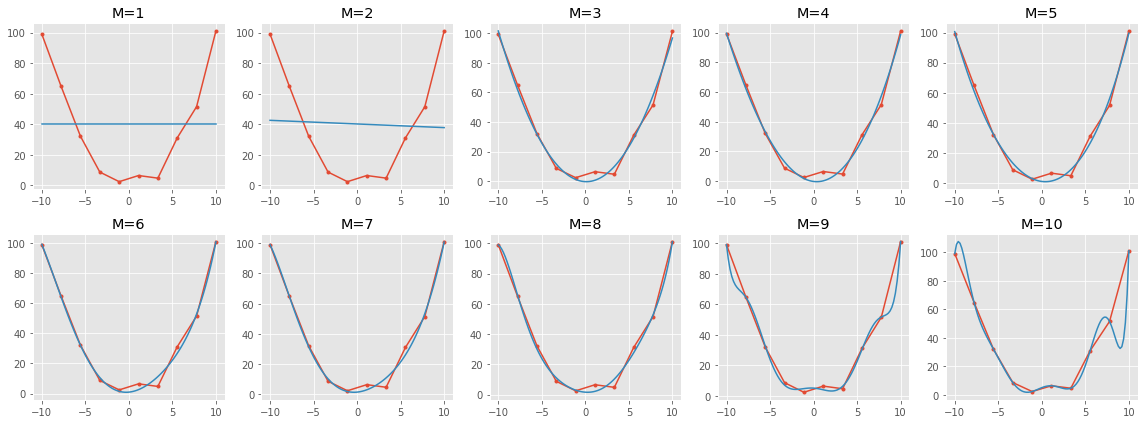

In [24]:
plt.figure(figsize=(16, 6))
for m in range(1, 11):
    w = fitting(x, y, m)
    x_est = np.linspace(-10, 10, 100)
    y_est = f(x_est, w)
    plt.subplot(2, 5, m)
    plt.title('M={}'.format(m))
    plt.plot(x, y, marker='.')
    plt.plot(x_est, y_est)
plt.tight_layout()
plt.show()